In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ANÁLISIS DE DATOS EXPLORATORIO Y LIMPIEZA DE DATOS
Se explora el dataset winemag-data_first150k.csv y se hace limpieza básica de datos así como análisis estadístico general.
-valores nulos
-limpieza de texto
-analisis estadístico
-visualización de datos 
-correlación de variables numéricas 

In [2]:
df=pd.read_csv('winemag-data_first150k.csv')
df.sample(7).transpose()

,150720,74682,53265,53383,20420,68117,54562
Unnamed: 0,150720,74682,53265,53383,20420,68117,54562
country,France,Portugal,US,US,France,Italy,US
description,Bears a striking resemblance to blueberry pie ...,The wood aging has not yet left the fruit behi...,"This is dry, smooth and creamy in the mouth, w...",This is a light Pinot Noir that tastes of bare...,"A delicious example of Costières de Nîmes, thi...","The modest cherry, dark berry and black tea no...",The nose on this Sauvignon Blanc is an amalgam...
designation,NaN,Colheita,NaN,NaN,NaN,NaN,NaN
points,84,93,91,86,89,81,84
price,8.0,53.0,35.0,15.0,12.0,15.0,24.0
province,Rhône Valley,Port,California,California,Rhône Valley,Tuscany,Virginia
region_1,Costières de Nîmes,NaN,Sonoma County,North Coast,Costières de Nîmes,Chianti Classico,Virginia
region_2,NaN,NaN,Sonoma,North Coast,NaN,NaN,NaN
variety,Rhône-style Red Blend,Port,Cabernet Sauvignon,Pinot Noir,Rhône-style Red Blend,Sangiovese,Sauvignon Blanc


In [3]:
print(f"INFORMACIÓN GENERAL DEL DATASET")
print({df.info()})
print("~"*50)
print(f"VALORES NULOS")
print(df.isnull().sum())
print('~'*50)
print(f"PORCENTAJE DE VALORES NULOS")
print(df.isnull().sum()*100/len(df))


INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
{None}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VALORES NULOS
Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       2

In [5]:
#se remplazan los valores nulos 
temp=df.fillna({'country':'country_unknown','designation':'designation_unknown','price':df['price'].mean(),'province':'province_unknown','region_1':'region_1_unknown','region_2':'region_2_unknown'})
temp.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

In [6]:
temp=temp.drop(columns=['Unnamed: 0'])
duplicados = temp[temp.duplicated(keep=False)]

# Agrupar por todas las columnas para ver qué filas son iguales
grupos = temp.groupby(temp.columns.tolist()).apply(lambda x: list(x.index))

print("Grupos de filas idénticas:")
for fila, indices in grupos.items():
    if len(indices) > 1:
        print(f"Filas {indices} son iguales:")

Grupos de filas idénticas:
Filas [4642, 4864] son iguales:
Filas [17926, 71776] son iguales:
Filas [17937, 71787] son iguales:
Filas [64829, 148469] son iguales:
Filas [18942, 81942] son iguales:
Filas [15206, 63716, 115796, 118376] son iguales:
Filas [60321, 116541] son iguales:
Filas [65721, 149001] son iguales:
Filas [54835, 75475] son iguales:
Filas [68192, 139352] son iguales:
Filas [66487, 87307, 123607] son iguales:
Filas [68796, 140556] son iguales:
Filas [68357, 139667] son iguales:
Filas [14017, 43777, 87667] son iguales:
Filas [69243, 141453] son iguales:
Filas [19118, 82838] son iguales:
Filas [14168, 62738, 115268] son iguales:
Filas [17921, 71771] son iguales:
Filas [101340, 129120] son iguales:
Filas [47025, 118185] son iguales:
Filas [67189, 133639] son iguales:
Filas [64415, 148145] son iguales:
Filas [62182, 145612] son iguales:
Filas [65279, 148739] son iguales:
Filas [39914, 83774] son iguales:
Filas [16493, 53843, 108893] son iguales:
Filas [45291, 89181] son igual

In [7]:
#Borrar filas iguales 
temp=temp.drop_duplicates()
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97851 entries, 0 to 149639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      97851 non-null  object 
 1   description  97851 non-null  object 
 2   designation  97851 non-null  object 
 3   points       97851 non-null  int64  
 4   price        97851 non-null  float64
 5   province     97851 non-null  object 
 6   region_1     97851 non-null  object 
 7   region_2     97851 non-null  object 
 8   variety      97851 non-null  object 
 9   winery       97851 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


ANÁLISIS ESTADÍSTICO DE VARIABLES NUMÉRICAS


In [6]:
temp.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
country,US,Spain,US,US,France
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft..."
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend


#quitar valores repetidos 

In [8]:

temp.to_csv('df-clean.csv',index=False)#CREO DATASET SIN VALORES NULOS NI DUPLICADOS
#dfc=pd.read_csv('df-clean.csv')
#dfc.info()
#temp2=dfc.to_csv('ddf-clean.csv')
#temp22=pd.read_csv('ddf-clean.csv')
#temp22.info()

In [9]:
#por ahora descartamos la  descripción
temp=temp.drop(columns=['description'])
num_cols=temp.select_dtypes(include=['int64','float64'])
num_cols.sample(3).transpose()


,82674,18694,37918
points,84.0,86.000000,91.0
price,14.0,33.131482,25.0


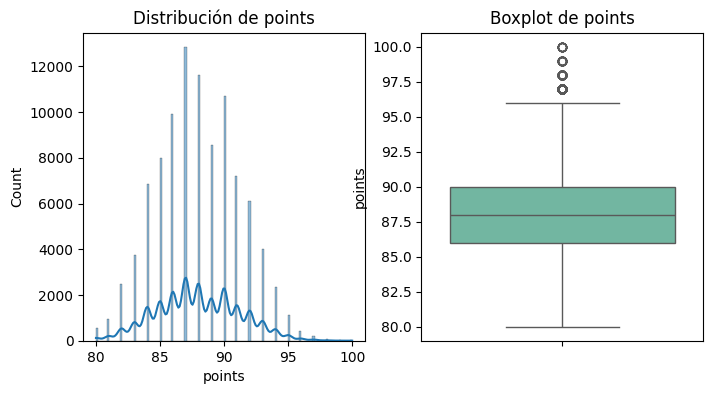

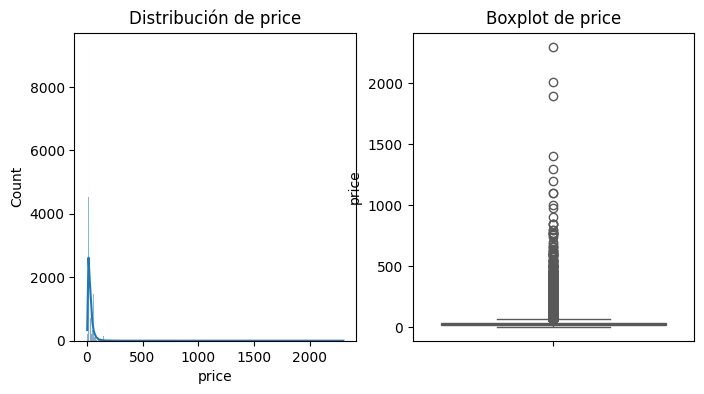

In [12]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(temp[col],kde=True,palette='Set3')
    plt.title(f'Distribución de {col}')

    plt.subplot(1,2,2)
    sns.boxplot(y=temp[col],palette='Set2')
    plt.title(f'Boxplot de {col}')
    plt.show

ESTADÍSTICA DE VARIABLES CATEGÓRICAS

In [13]:
cat_cols=temp.select_dtypes(include=['object'])
cat_cols.sample(5).transpose()

,109998,99578,22122,53007,63602
country,France,Portugal,France,France,Italy
designation,Barrel sample,designation_unknown,Les Rugiens Premier Cru,designation_unknown,Rocche
province,Bordeaux,Douro,Burgundy,Burgundy,Piedmont
region_1,Margaux,region_1_unknown,Pommard,Bourgogne Côtes d’Auxerre,Barolo
region_2,region_2_unknown,region_2_unknown,region_2_unknown,region_2_unknown,region_2_unknown
variety,Bordeaux-style Red Blend,Touriga Nacional,Pinot Noir,Pinot Noir,Nebbiolo
winery,Château Ferrière,Quinta do Vallado,Domaine de Courcel,Simonnet-Febvre,Vietti


distribución de country:
country
US             0.414344
Italy          0.151761
France         0.147765
Spain          0.055625
Chile          0.038170
Portugal       0.035850
Argentina      0.035227
Australia      0.032212
Austria        0.020020
New Zealand    0.019060
Name: proportion, dtype: float64


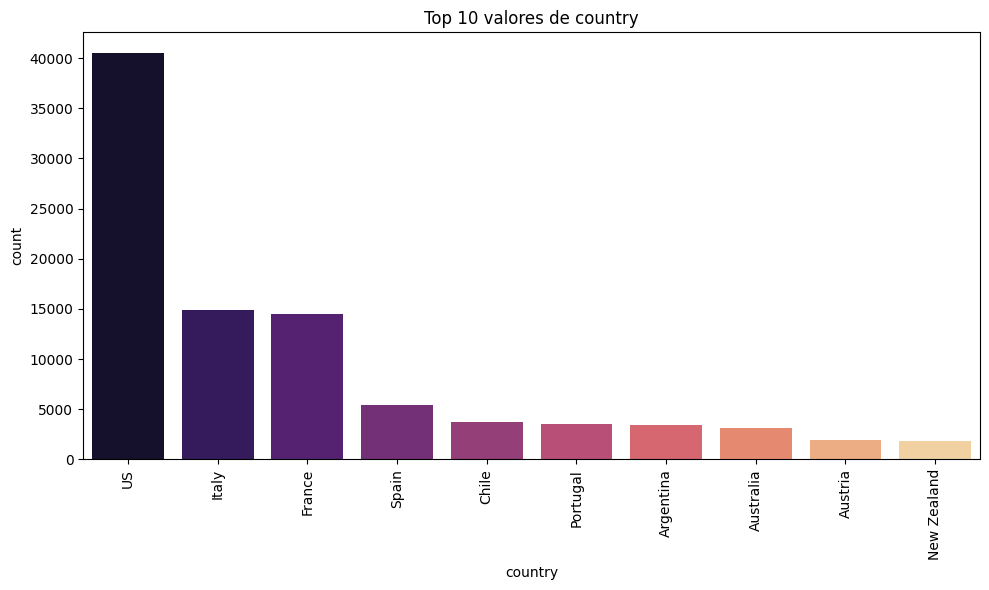

distribución de designation:
designation
designation_unknown    0.305526
Reserve                0.018079
Reserva                0.011528
Estate                 0.010393
Barrel sample          0.007746
Barrel Sample          0.006173
Riserva                0.005181
Brut                   0.004057
Estate Grown           0.003229
Crianza                0.003168
Name: proportion, dtype: float64


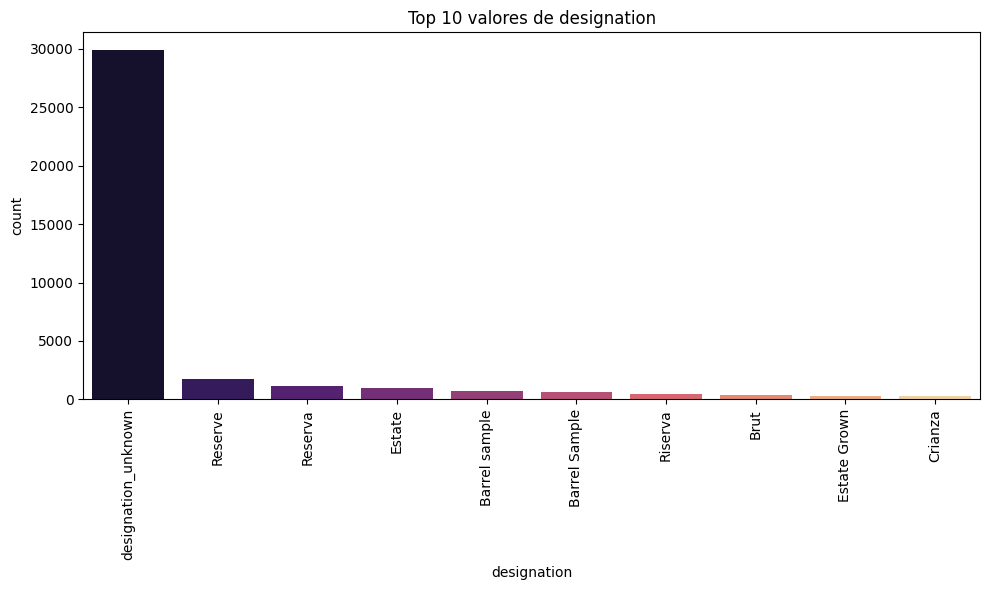

distribución de province:
province
California          0.294325
Washington          0.066213
Tuscany             0.047123
Bordeaux            0.045314
Northern Spain      0.032662
Burgundy            0.029862
Mendoza Province    0.029852
Oregon              0.029320
Veneto              0.025733
Piedmont            0.023372
Name: proportion, dtype: float64


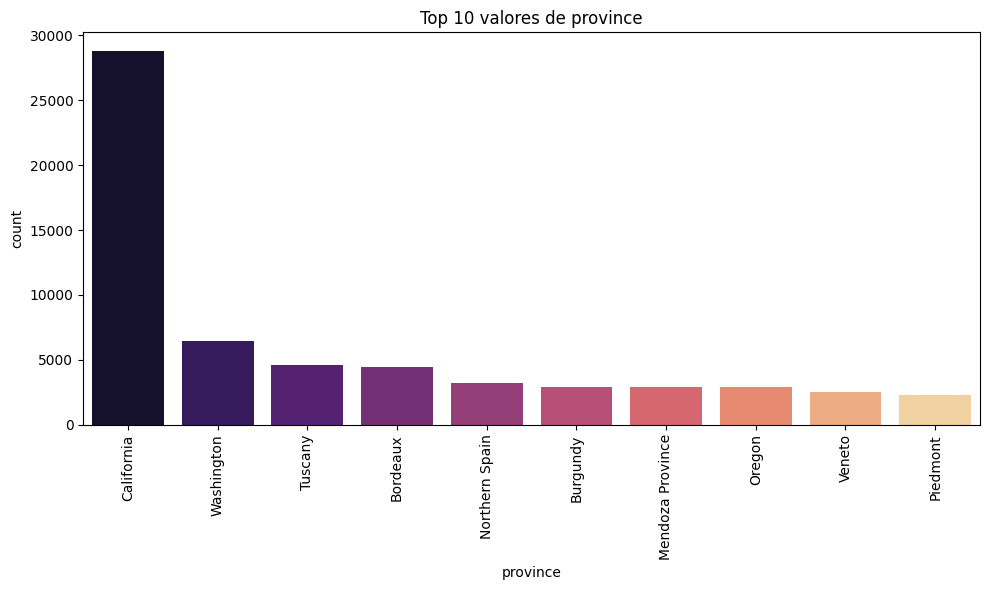

distribución de region_1:
region_1
region_1_unknown        0.162819
Napa Valley             0.042217
Columbia Valley (WA)    0.034072
Russian River Valley    0.023526
California              0.022769
Mendoza                 0.022473
Paso Robles             0.019172
Willamette Valley       0.013040
Rioja                   0.012795
Alsace                  0.012683
Name: proportion, dtype: float64


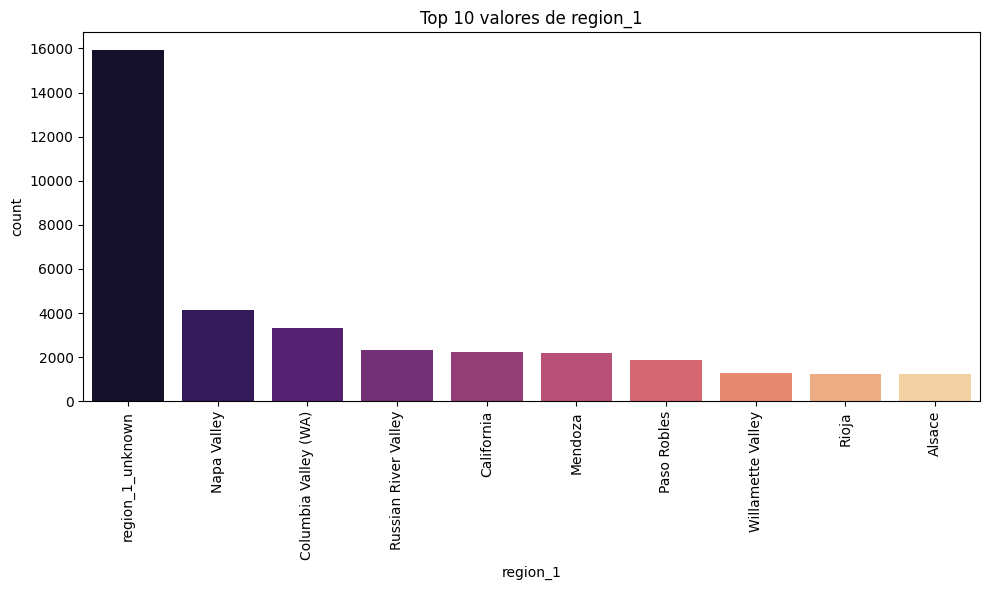

distribución de region_2:
region_2
region_2_unknown           0.596417
Central Coast              0.085620
Sonoma                     0.073316
Columbia Valley            0.062176
Napa                       0.059979
California Other           0.023117
Willamette Valley          0.020225
Mendocino/Lake Counties    0.015922
Sierra Foothills           0.010884
Napa-Sonoma                0.010414
Name: proportion, dtype: float64


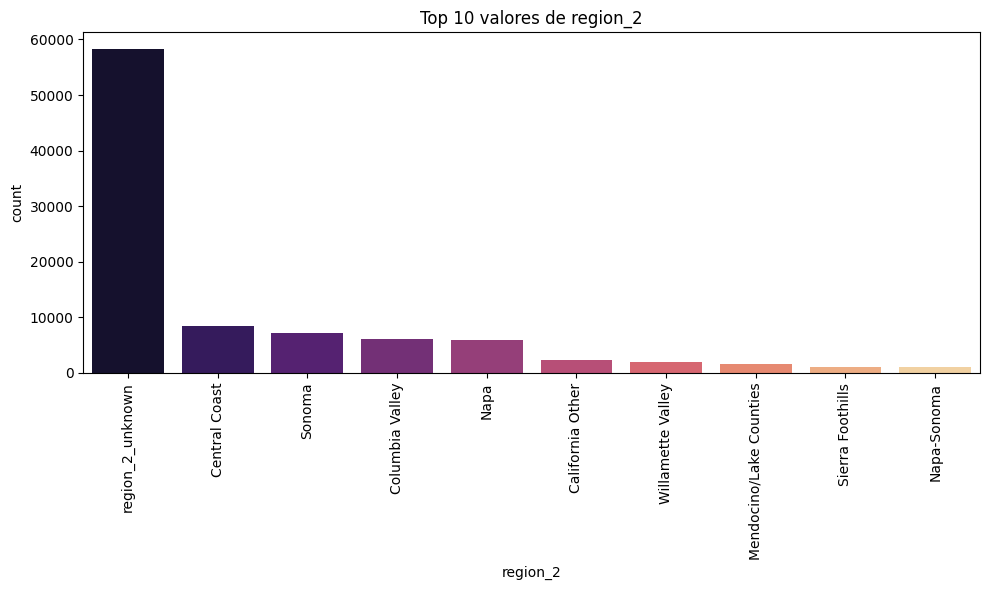

distribución de variety:
variety
Pinot Noir                  0.094869
Chardonnay                  0.093642
Cabernet Sauvignon          0.084537
Red Blend                   0.066274
Bordeaux-style Red Blend    0.052897
Sauvignon Blanc             0.041257
Syrah                       0.037434
Riesling                    0.036637
Merlot                      0.032478
Zinfandel                   0.024619
Name: proportion, dtype: float64


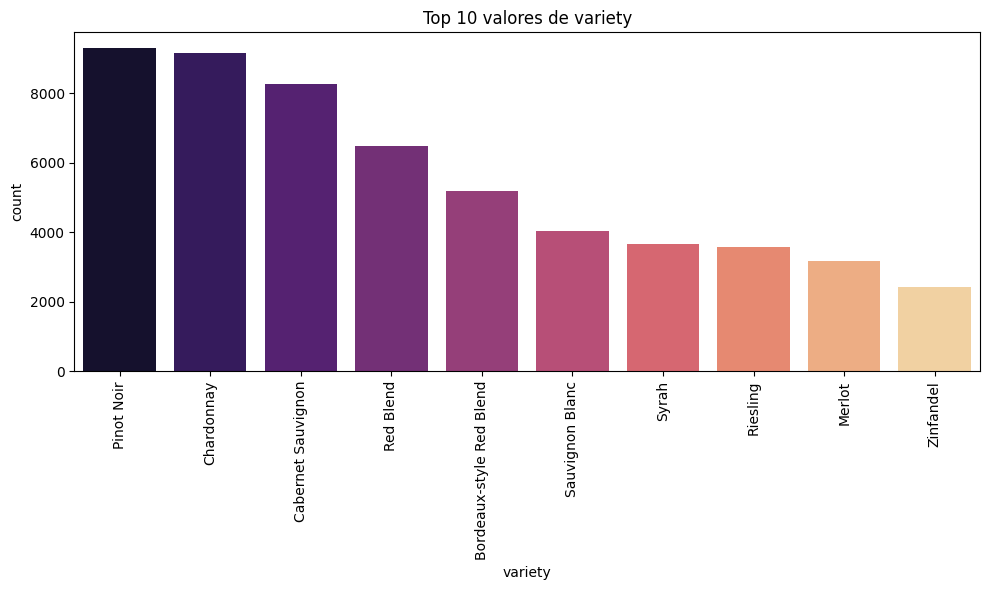

distribución de winery:
winery
Williams Selyem          0.002402
Testarossa               0.001748
Chateau Ste. Michelle    0.001594
Columbia Crest           0.001553
DFJ Vinhos               0.001513
Concha y Toro            0.001349
Georges Duboeuf          0.001318
Kendall-Jackson          0.001277
Joseph Drouhin           0.001237
Trapiche                 0.001226
Name: proportion, dtype: float64


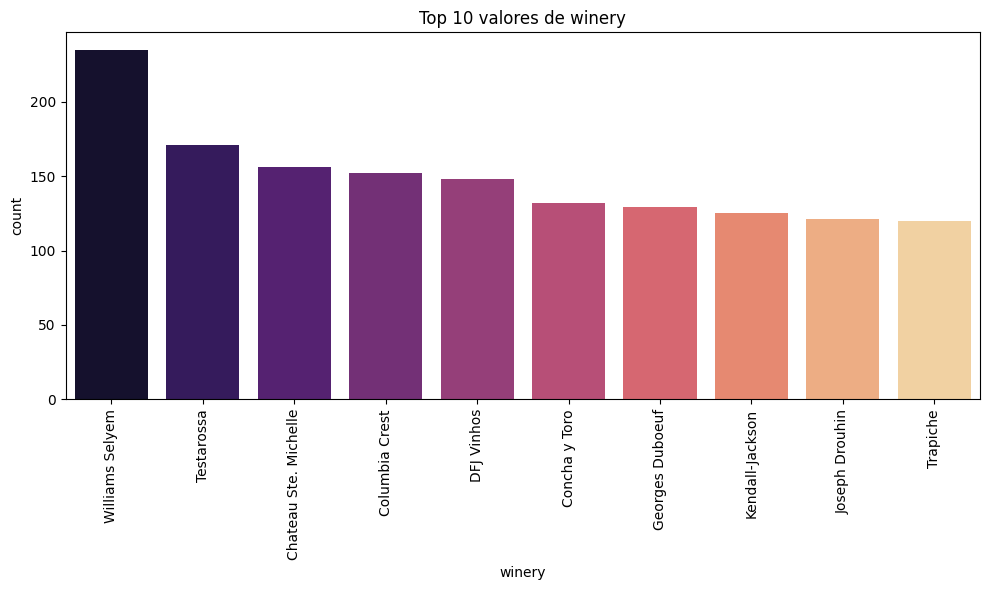

In [14]:
for column in cat_cols:
    print(f'distribución de {column}:')
    print(temp[column].value_counts(normalize=True).head(10))

    top_cat=temp[column].value_counts().head(10).index.tolist()

    temp_filt=temp[temp[column].isin(top_cat)].copy()

     # Crear el gráfico
    plt.figure(figsize=(10, 6))
    
    # Ordenar las categorías por frecuencia (opcional pero recomendado)
    order = temp_filt[column].value_counts().index
    
    sns.countplot(x=column, data=temp_filt, order=order,palette='magma')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 valores de {column}')
    plt.tight_layout()
    plt.show()

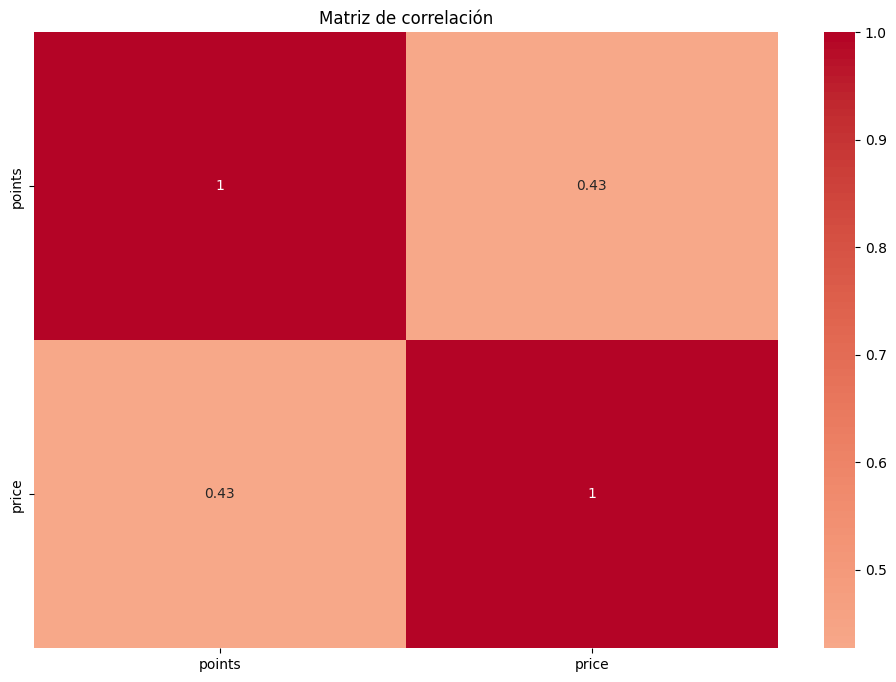

In [15]:
#------------MATRIZ DE CORRELACION--------------------

if len(num_cols)>1:
    plt.figure(figsize=(12,8))
    sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm',center=0)
    plt.title('Matriz de correlación')
    plt.show()